In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# The "Unsinkable" RMS(Royal Mail Steamer) Titanic Sank

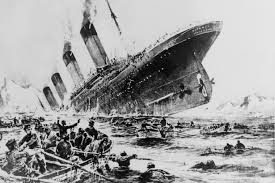

# Step By Step Process to Solve a Data Science Problem
1. Problem Identification
2. Get the relavent data

     2.1 Load the dataset
3. Exploratory data analysis

     3.1 Descriptive Analysis
     
     3.2 Categorical Data Analysis
     
     3.3 Data Visualization and Feature Relation
4. Data Preprocessing

     4.1 Data Cleaning and Treating Missing data
     
     4.2 Outliers Detection and Treating Outliers
5. Identify Evaluation Parameters

     5.1 Accuracy
6. Feature Engineering
7. Pre - modeling Work
8. Model Building

     8.1 Logistic Regression
     
     8.2 K Nearest Neighbours
     
     8.3 Decision Tree
9. Perform Model Comparison
### 1. Problem Identification
One can identify what the problem is about in the description of this competition. Here is the overview:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

#### In this challenge, we are asked to build a predictive model that answers the question: "What sort of people were more likely to survive?" using the passenger data.

Link to the problem description: [Titanic Challenge Overview](https://www.kaggle.com/c/titanic/overview)

### 2. Get the relavent data
The data is provided here in this challenge. One can read the data description in the data section of this competition page. Link to the data overview: [Titanic Data Description](https://www.kaggle.com/c/titanic/data)

#### Import Libraries for EDA
1. [NumPy](https://numpy.org/):
    * It stands for Numerical Python.
    * It is the fundamental package for scientific computing.
    * It is used for working with arrays.
    * It has functions for working in domain of linear algebra and matrices.
2.[Pandas](https://pandas.pydata.org/about/):
    * Data analysis / manipulation tool in Python.
    * It is used for doing practical, real world data analysis in Python.
    * It provides high performance, easy - to - use data structures and data analysis tools.
3. [Matplotlib](https://matplotlib.org/):
    * For creating interactive visualizations.
    * Built on NumPy arrays.
4. [Seaborn](https://seaborn.pydata.org/)
    * Data visualization library based on matplotlib.
    * For informative statistical graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Load the Datasets

In [2]:
# Load training data
train_data = pd.read_csv("train.csv")

# Load test data
test_data = pd.read_csv("test.csv")

In [3]:
# First look at the train data
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S


* Survived is out target variable. We have to predict whether the passenger survived or not for test data.
* Convert PassengerID to index column.

In [4]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

### 3. Exploratory Data Analysis (EDA)
##### Why EDA:
* To analyse and understand the patterns of each of the variables.
* To check missing values, outliers, etc.
* Observe the relation between different variables

##### Data Types
Let's first understand different data types. <b>Some facts and statistics that are collected together for reference or analysis are data.</b>

#### Types of Data:
* <b>Qualitative/ Categorical:</b> Data is desciptive  in nature; describes an attribute that can be observed but not measured
    * <b>Nominal:</b> Unordered (Finite number of possible values)
    
     -<b>col</b> Sex, Embarled are of this type
    * <b>Ordinal:</b> Ordered (Finite number of possible values)
    
     - <b>col</b> Pclass is of this type, it has values 1st class, 2nd class and 3rd class
    * <b>Text: </b> Text in nature,
    
    - <b>col</b> Name is text data in this data set.
    
* <b>Quantitative/Numerical:</b> Data is numeric in nature; describes measure of an attribute
    * <b>Descrete:</b> Finite number of possible values (only integers)(can also treated as categorical)
    
     - <b>col</b> sibSp and parch are of this type
    * <b>Continuous:</b> Infinite number of possible values (decimals or integers, usually decimals)
    
     - <b>col</b> Age and Fare are of this type
    

### 3.1 Descriptive Analysis
* <b>Statistics is concerned with</b>: Processing and Analyzing data. Collecting, presenting and transforming data to assist decision makers.
* <b>Descriptive Measures: </b> The <b>statistical</b> methods used to extract and measure three features, <b>central tendency, dispresion and skewness</b> in the data. Also known as <b>summary measures</b>

In [5]:
# Check the information of datasets
print('*' * 20,'Training Data', '*' * 20)
print(train_data.info())
print('*' * 20,'Test data','*' * 20)
print(test_data.info())

******************** Training Data ********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
******************** Test data ********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-nul

#### Training data:
* There are total 891 observations with 11 columns/variables/features.
* There are both numerical and categorical data.
* Age, Cabin and Embarked variables have 714, 204 and 889 non -null values respectively. So there are some missing values in these columns.

#### Test data:
* There are total 418 observations with 10 columns/variables.features.
* The missing variable is Survived as it is the target column that we want to predict.
* There are both numerical and categorical data.
* Age and Cabin variables have 332 and 91 non-null values respectively. So there are missing values in these columns.

In [6]:
# Descriptive measures of data
train_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Interpreting Data Desciption
* <b>count</b> is the total number of non null obervations in each column.
* <b>mean</b> is the mean value of all non null observations in each column.
* <b>std</b> is the standard deviation (i.e. measure of variation).
* <b>min,25%,50%,75% and max</b> are obtained after sorting each column in ascending order.
    * <b>min:</b> the smallest value
    * <b>25%</b> the first quartile value
    * <b>50%</b> the second quartile value
    * <b>max</b> the largest value
<hr>
* Name and Ticket features have 891 and 681 unique values. It seems to be difficult to convert these two feature into some usefull information. So better we will drop it latter.
* We can also think of a passenger cannot survive on the basis of his name or ticket number. But if there are any impact of these two variables on the passengers survival, that would be very less and we could easy drop these features.



* Cabin feature has 147 unique observations. Let's have a look at it.

In [7]:
print(train_data.Cabin.describe())

print('*' * 20, 'Unique values in cabin', '*' * 20)
print(train_data['Cabin'].unique())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object
******************** Unique values in cabin ********************
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' '

* Cabin has only 204 non null observations.
* Out of 204,147 unique observations are there.
* Let's see the missing value percentage for this feature.

In [8]:
train_data.Cabin.isnull().sum()/len(train_data) * 100

77.10437710437711

* Cabin has missing values more than 77%. We can think of removing this feature too.


### Skewness
* Describes how data are distributed
* It is measures of shape: Symmetrical pr Asymmetrical

In [9]:
# Checking the skewness
train_data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

* Survived, Pclass and Age are nearly symmertical in shape.
* SibSp, Parch and Fare variables are positively skewed (asymmetircal in shape).

### 3.2 Categorical Data Analysis
Categorical columns/ variables are:
* <b>pclass:</b> A proxy for socio-economoic status (SES); 1st = Upper, 2nd = Middle, 3rd = Lower
* <b>Sex</b>: Gender of the passenger; Male or Female 
* <b>Embarked:</b> Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampation




### One way Frequency Table 
A way to display frequencies or relative frequencies of one categorical column.

In [10]:
# Pclass
print('*' * 20, "Passenger's count by Socio - economic status", '*' * 20)
print(train_data['Pclass'].value_counts())

# Sex
print('*' * 20,"Passenger's count by Gender", '*' * 20)
print(train_data['Sex'].value_counts())

# Embarked
print('*' * 20, "Passenger's count by Port of Embarkation", '*' * 20)
print(train_data['Embarked'].value_counts())

******************** Passenger's count by Socio - economic status ********************
3    491
1    216
2    184
Name: Pclass, dtype: int64
******************** Passenger's count by Gender ********************
male      577
female    314
Name: Sex, dtype: int64
******************** Passenger's count by Port of Embarkation ********************
S    644
C    168
Q     77
Name: Embarked, dtype: int64


* Maximum passengers trabelling in titanic were from 3rd class of socio-economic status
* Maximum passengers travelling in titanic were Male 
* Maximum passengers travelling in titanic were embarked from Southampton(S)

### Two way Frequency Table 
A way to display frequencies or relative frequencies of two categorical variable.

In [11]:
# pclass and sex
print('*' * 20, "Frequency count of passengers by Passenger's class and gender", '*' * 20)
table1 = pd.crosstab(train_data['Pclass'],train_data['Sex'],margins=True,margins_name='Sum')
print(table1)

# Pclass and Embarked
print('*' * 20, "Frequency count of passengers by Passenger's class and their port of Embarkation", '*' * 20)
table2=pd.crosstab(train_data['Pclass'],train_data['Embarked'],margins=True,margins_name='Sum')
print(table2)

# Gender and Embarked
print('*' * 20, "Frequency count of passengers by Passenger's port of Embarkation and gender", '*' * 20)
table3=pd.crosstab(train_data['Sex'],train_data['Embarked'],margins=True,margins_name='Sum')
print(table3)

******************** Frequency count of passengers by Passenger's class and gender ********************
Sex     female  male  Sum
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
Sum        314   577  891
******************** Frequency count of passengers by Passenger's class and their port of Embarkation ********************
Embarked    C   Q    S  Sum
Pclass                     
1          85   2  127  214
2          17   3  164  184
3          66  72  353  491
Sum       168  77  644  889
******************** Frequency count of passengers by Passenger's port of Embarkation and gender ********************
Embarked    C   Q    S  Sum
Sex                        
female     73  36  203  312
male       95  41  441  577
Sum       168  77  644  889


* In each class of passengers travelling in titanic, male counts were more than female.
* In each classes of passengers travelling in titanic , passengers from Southampton were maximum in count.
* From each port of Embarkaton, Male passengers were more tham female passengers.

### 3.3 Data Visualization and Feature Relation
<b>Data => Information, Visualization => Pictorial / Graphical Representation </b> The pictorial or graphical representation of data is termed as data visualization.


Why Data Visualization?
* For understanding the data clearly 
* To find relationship among different features of data
* To do comparative analysis
* The information gained through visual is far beyond any other way

#### Distribution of Continuous Variables

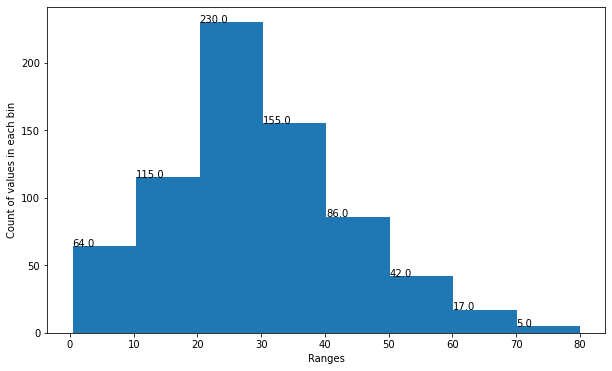

In [12]:
# Age
plt.figure(figsize=(10,6))
plot = plt.hist(train_data.Age, bins = 8, histtype='bar') # plot a histogram
plt.ylabel('Count of values in each bin')
plt.xlabel('Ranges')
for i in range(8):
    plt.text(plot[1][i],plot[0][i],str(plot[0][i])) # display the count of values falling in each range

In [13]:
# check the skewness of Age
train_data.Age.skew()

0.38910778230082704

* Age variable us moderately skewed(-0.5 < skewness < 0.5 are moderately skewed)
* The distribution of the Age variable is nearly symmetrical.

Text(0.0, 732.0, '732.0')
Text(51.23292, 106.0, '106.0')
Text(102.46584, 31.0, '31.0')
Text(153.69876, 2.0, '2.0')
Text(204.93168, 11.0, '11.0')
Text(256.1646, 6.0, '6.0')
Text(307.39752, 0.0, '0.0')
Text(358.63044, 0.0, '0.0')
Text(409.86336, 0.0, '0.0')
Text(461.09628, 3.0, '3.0')


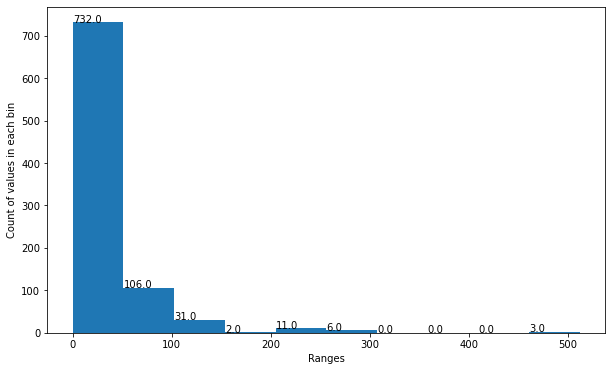

In [14]:
# Fare
plt.figure(figsize=(10,6))
plot = plt.hist(train_data.Fare, bins=10, histtype='bar')
plt.ylabel('Count of values in each bin')
plt.xlabel('Ranges')
for i in range(10):
    print(plt.text(plot[1][i],plot[0][i],str(plot[0][i]))) # display the count of values falling in each range

In [15]:
# check skewness of Fare variable 
train_data.Fare.skew()

4.787316519674893

Text(0, 0.5, 'Fare')

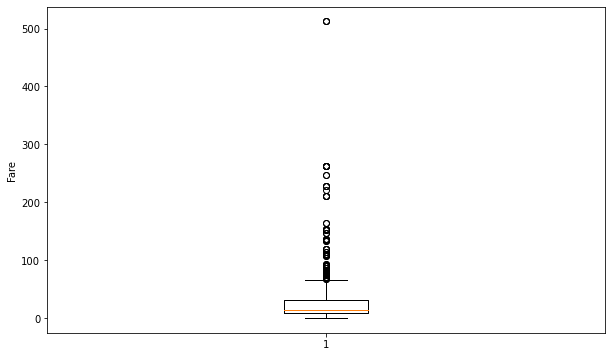

In [16]:
# Boxplot: to observe outliers
plt.figure(figsize=(10,6))
plt.boxplot(train_data.Fare)
plt.ylabel('Fare')

* Fare is  highly skewed 
* Distribution is asymmetrical 
* There are outliers in Fare variable

#### Descrete variables

<AxesSubplot:xlabel='SibSp', ylabel='count'>

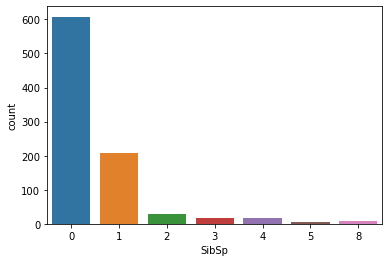

In [17]:
# SibSp
sns.countplot(train_data.SibSp) # counts the frequency of each values

<AxesSubplot:xlabel='Parch', ylabel='count'>

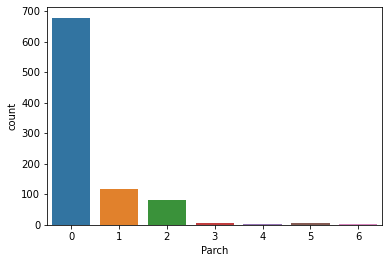

In [18]:
# Parch
sns.countplot(train_data.Parch) # counts the frequency of each values

<AxesSubplot:xlabel='Survived', ylabel='count'>

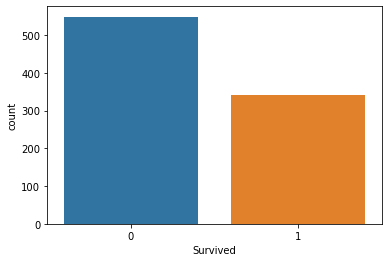

In [19]:
# Survived
sns.countplot(train_data.Survived)

* Descrete variables can also be considered as categorical variables.
* Maximum passengers travelling in titanic had no Sibling or Spouse aboard the titanic 
* Maximum passengers travelling in titanic had no parent/children aboard the titanic
* 0 = Not Survied, 1 = Survived, Maximum passengers had died.

### Categorical Variables

<AxesSubplot:xlabel='Sex', ylabel='count'>

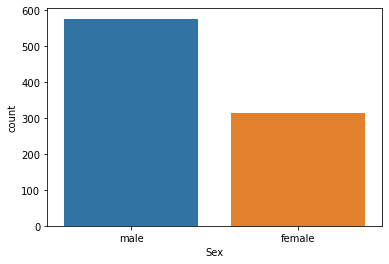

In [20]:
#sex
sns.countplot(train_data.Sex)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

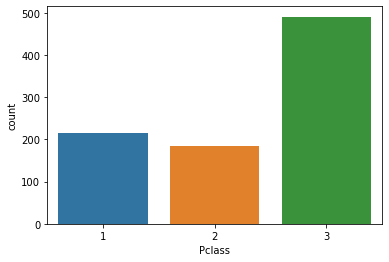

In [21]:
# Pclass
sns.countplot(train_data.Pclass)

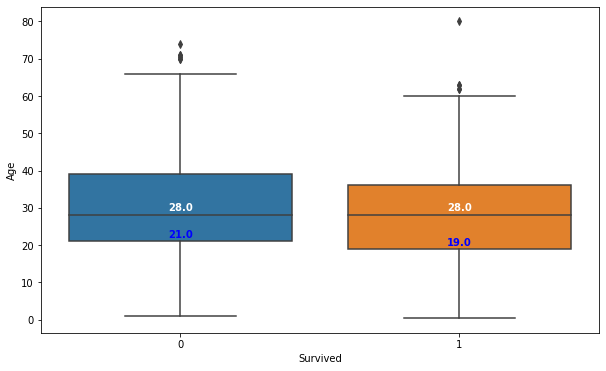

In [22]:
# Boxplot: shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable 

plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x = train_data.Survived, y = train_data.Age, data = train_data)

# Adding text in the boxplot like median value. first quartile value and third quaritle value 
medians = train_data.groupby(['Survived'])['Age'].median()
first_quartile = train_data.groupby(['Survived'])['Age'].quantile(0.25)
third_quartile = train_data.groupby(['Survived'])['Age'].quantile(0.75)

#Verticacl distace from lines to display the particular value
vertical_offset_median = train_data['Age'].median() * 0.05
vertical_offset_fquartile = train_data['Age'].quantile(0.25) * 0.05
vertical_offset_tquartile = train_data['Age'].quantile(0.75) * 0.05
for xtick in box_plot.get_xticks():
    
    # Display text at median (Second quartile)
    box_plot.text(xtick,medians[xtick] + vertical_offset_median,medians[xtick],horizontalalignment='center',size='medium',color='w',weight='semibold')
    
    # Display text at first quartile
    box_plot.text(xtick,first_quartile[xtick] + vertical_offset_fquartile,first_quartile[xtick],horizontalalignment='center',size='medium',color='b',weight='semibold')
    
    # Display test at third quartile
    box_plot.text(xtick,third_quartile[xtick] + vertical_offset_tquartile,third_quartile[xtick],horizontalalignment='left',size='medium',color='w',weight='semibold')

* Median age for both survived passengers and not survived passengers are equal.


#### Fake and Survived

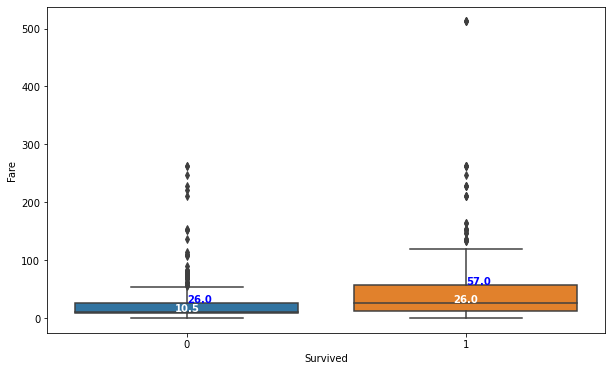

In [23]:
# Boxplot: shows the distribution of quantitative data in a way 
# that facilitates comparisons between variables or across levels of a categorical variable

plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x = train_data.Survived, y = train_data.Fare, data = train_data)


# Adding text in the boxplot like median value, first quartile value and third quartile value
medians = train_data.groupby(['Survived'])['Fare'].median()
first_quartile = train_data.groupby(['Survived'])['Fare'].quantile(0.25)
third_quartile = train_data.groupby(['Survived'])['Fare'].quantile(0.75)

# Vertical distance from lines to display the particular value
vertical_offset_median = train_data['Fare'].median() * 0.05 
vertical_offset_fquartile = train_data['Fare'].quantile(0.25) * 0.05 
vertical_offset_tquartile = train_data['Fare'].quantile(0.75) * 0.05
for xtick in box_plot.get_xticks():
    
    # Display text at median (Second quartile)
    box_plot.text(xtick,medians[xtick] + vertical_offset_median,medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
    
    # Display text at third quartile
    box_plot.text(xtick,third_quartile[xtick] + vertical_offset_tquartile,third_quartile[xtick], 
            horizontalalignment='left',size='medium',color='b',weight='semibold')

* Median Fare for those who did not survived was 10.5 and those who survived was 26.5. We can say that the survival of the passenger was dependent on the Fare.
* There seems to be some outliers greater than 300.

### Age and Sex

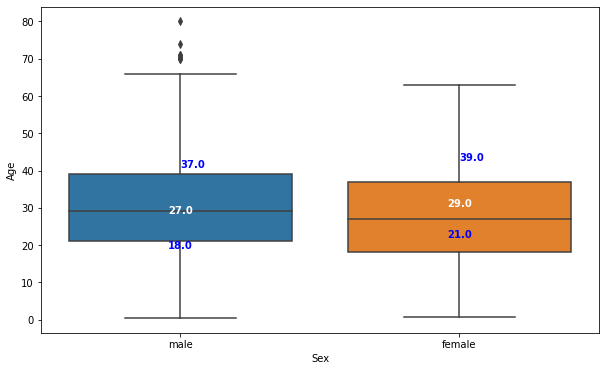

In [24]:
# Boxplot: shows the distribution of quantitative data in a way 
# that facilitates comparisons between variables or across levels of a categorical variable

plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x = train_data.Sex, y = train_data.Age, data = train_data)


# Adding text in the boxplot like median value, first quartile value and third quartile value
medians = train_data.groupby(['Sex'])['Age'].median()
first_quartile = train_data.groupby(['Sex'])['Age'].quantile(0.25)
third_quartile = train_data.groupby(['Sex'])['Age'].quantile(0.75)

# Vertical distance from lines to display the particular value
vertical_offset_median = train_data['Age'].median() * 0.05 
vertical_offset_fquartile = train_data['Age'].quantile(0.25) * 0.05 
vertical_offset_tquartile = train_data['Age'].quantile(0.75) * 0.1
for xtick in box_plot.get_xticks():
    
    # Display text at median (Second quartile)
    box_plot.text(xtick,medians[xtick] + vertical_offset_median,medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
    
    # Display text at first quartile
    box_plot.text(xtick,first_quartile[xtick] + vertical_offset_fquartile,first_quartile[xtick], 
            horizontalalignment='center',size='medium',color='b',weight='semibold')
    
    # Display text at third quartile
    box_plot.text(xtick,third_quartile[xtick] + vertical_offset_tquartile,third_quartile[xtick], 
            horizontalalignment='left',size='medium',color='b',weight='semibold')

### Sex and Survived

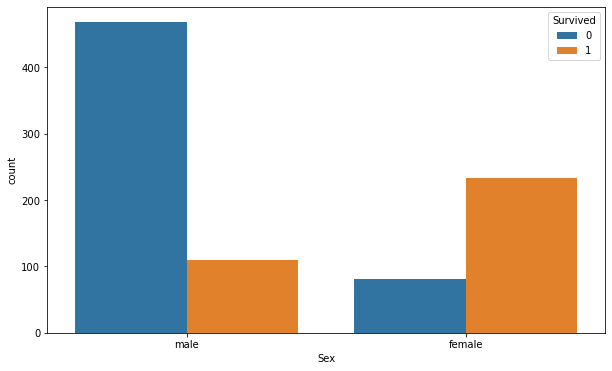

In [25]:
plt.figure(figsize=(10,6))
count_plot = sns.countplot(x = train_data.Sex, hue = train_data.Survived)

* Maximum male passengers had died and most of the female passengers survived. Female passengers were given priority for survival.
* Gender seems to be an important feature impacting the survival of passengers.

### Pclass and Survived

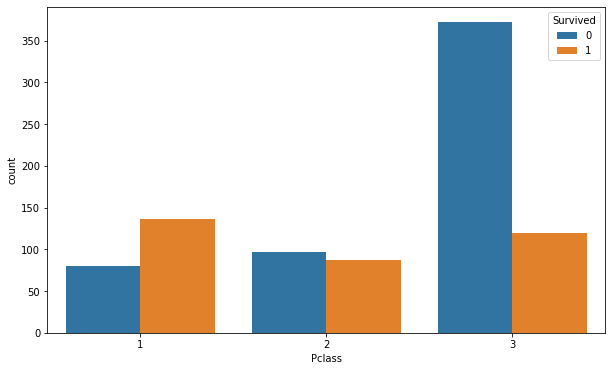

In [26]:
plt.figure(figsize=(10,6))
count_plot = sns.countplot(x = train_data.Pclass, hue = train_data.Survived)

### Subvived and Embarked 

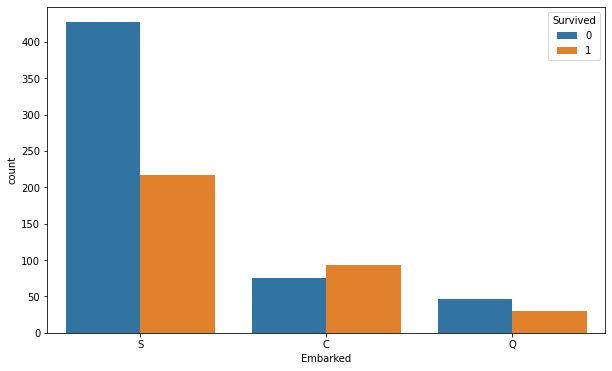

In [27]:
plt.figure(figsize=(10,6))
count_plot = sns.countplot(x = train_data.Embarked, hue = train_data.Survived)

* Maximum passengers were embarked from Southampton.
* Number of passengers died and survived are more from Southampton than other two port of embarkation.
* In case of Southamption and Queenstown, more passengers died than survived.
* Survived passengers count is more than died in case of Cherbourg.

### Survived and SibSp

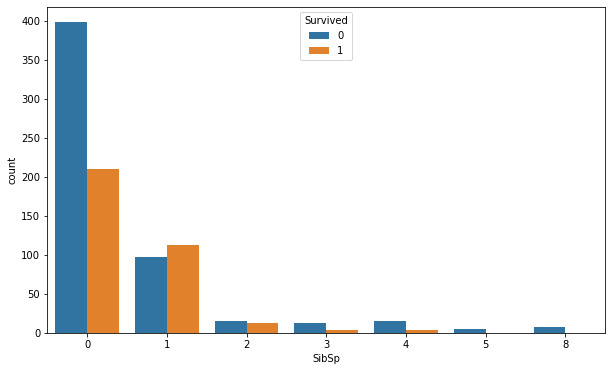

In [28]:
plt.figure(figsize=(10,6))
count_plot = sns.countplot(x= train_data.SibSp, hue = train_data.Survived)

* Passengers with 0,2,3,4,5,8 siblings/ spoises aboard the titanic died more than survived.
* Passengers with 1 siblings/ spouses aboard the titanic survived more than died 

### Survived and Parch

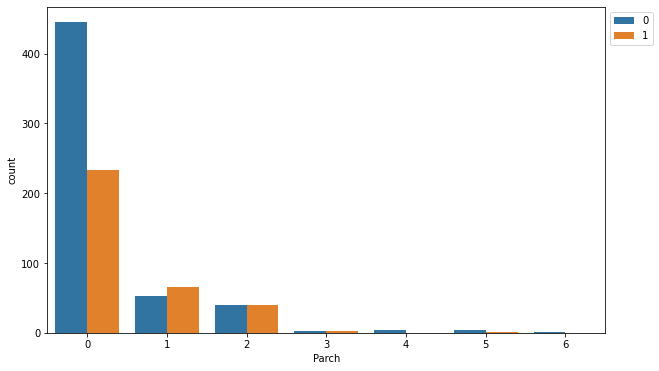

In [29]:
plt.figure(figsize=(10,6))
count_plot = sns.countplot(x= train_data.Parch, hue = train_data.Survived)
plt.legend(bbox_to_anchor=(1,1))

* Passengers with 0 parent/ childern aborad the titanic died more than survived
* Passengers with 1 parents/ childern aboard the titanic survived more than died 

### Correlation between different features

<AxesSubplot:>

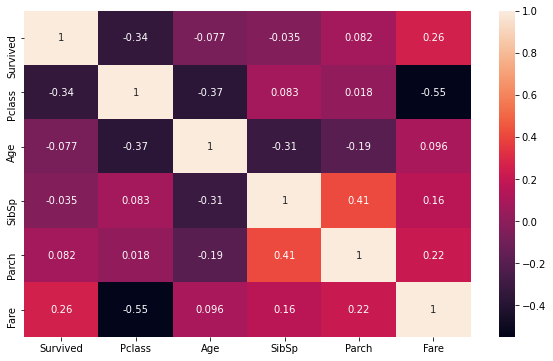

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), annot=True)# Returns correlation among features which have numerical observations

* Pclass, SibSp and Age are negatively correlated with survival of passengers
* Fare and Parch are positively correlated with the survival of passengers
* Pclass and Fare have relatively high negative correlation

### 4. Data Preproccessing 
* Data Preprocessing is a step in Machine Learning to get data transformed or encoded in such a way that the machine cam easily parse it.


### 4.1 Missing Values and its Treatment 
* Generally datasets always have some missing values.
* May be done during data collection, or due to some data validation rule.


#### Treatment of missing values
* Filling the missing values with right technique can change our results drastically.
* Also, there is no fixed rule of filling the missing values.
* No methods is prefect for filling the missing values. We need to use our common sense, our logic, or may need to see what works for that particulat data set.
#### Ways of filling missing values:
1. <b>Default value:</b> One can fill the missing value by default value on the basis of one's 1) Understanding of variable, 2) context/data insight or 3) common sense/logic. For example, suppose if we had some missing values in SibSp (i.e. # of siblings/spouses aboard the titanic), we could think of that the passengers had 0 siblings/spouses and that is why he might have left that particular field blank.

2. <b>Deleting:</b> Suppose in our dataset we have too many missing values in
    * <b>Column,</b> we can drop the column
    * <b>Row,</b> drop the row. Usually we do this for a large enough dataset.

3. <b>Mean/Median/Mode - Imputation:</b> We fill missing values by mean or median or mode(i.e. maximum occuring value). Generally we use mean but if there are some outliers, we fill missing values with median. Mode is used to fill missing values for categorical column.

In [31]:
# Function to calculate missing values
def calc_missing_values(df):
    """
    This function will take dataframe as an input and return the missing value information for each features as a dataframe.
    """
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = round(missing_count/len(df) * 100,2)
    missing_info = pd.concat([missing_count, missing_percent], axis =1, keys=['Missing Value Count','Percent of missing values'])
    return missing_info

print('*' * 20, 'Missing values information of Training data','*' * 20)
print(calc_missing_values(train_data))
print()
print('*' * 20,'Missing values information of Test DAta','*' * 20)
print(calc_missing_values(test_data))

******************** Missing values information of Training data ********************
          Missing Value Count  Percent of missing values
Cabin                     687                      77.10
Age                       177                      19.87
Embarked                    2                       0.22
Survived                    0                       0.00
Pclass                      0                       0.00
Name                        0                       0.00
Sex                         0                       0.00
SibSp                       0                       0.00
Parch                       0                       0.00
Ticket                      0                       0.00
Fare                        0                       0.00

******************** Missing values information of Test DAta ********************
          Missing Value Count  Percent of missing values
Cabin                     327                      78.23
Age                        86    

#### Missing Values Interpretation
* More than 77% of obervations are missing in <b>Cabin</b> feature of both training data test data.
* Approx. 20% of the observations are missing in the <b>Age</b> feature of both training and test data.
* 2 observations are missing in the <b>Embarked</b> feature only in training data. No missing value for Embarked feature in test data.
* 1 observation is missing in the <b>Fare</b> feature only in test data.

#### Treating Missing Values
1. We will drop <b>Cabin</b> column from both test and training dataset.
2. For <b>Age</b> column we will use Imputation bases on some obervations.
3. <b>Embarked</b> is categorical column so we will use <b>Mode-Imputation</b> to fill missing values.
4. As per our data visualizations, there were some outliers in <b>Fare</b> column, so we will fill missing value here with the median value.

##### Age
* As per our visualization, there are no outliers in the age variable. So, we will fill the missing values with mean age.

In [32]:
print('Mean age of passenger:', train_data.Age.mean())
print('Median age of passengers:', train_data.Age.median())

Mean age of passenger: 29.69911764705882
Median age of passengers: 28.0


In [33]:
train_data.Age.fillna(29.6, inplace=True)
test_data.Age.fillna(29.6, inplace=True)

##### Embarked
* This is a categorical column.
* We will fill missing values here with mode (i.e. maximum occuring value.)

In [34]:
train_data.Embarked.fillna(train_data.Embarked.mode().values[0], inplace=True)

##### Fare
'* As per pur visualizations, this column has some outliers. So, we will use median to fill the missing values here.


In [35]:
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)

A look at missing values

In [36]:
print(calc_missing_values(train_data))
print(calc_missing_values(test_data))

          Missing Value Count  Percent of missing values
Cabin                     687                       77.1
Survived                    0                        0.0
Pclass                      0                        0.0
Name                        0                        0.0
Sex                         0                        0.0
Age                         0                        0.0
SibSp                       0                        0.0
Parch                       0                        0.0
Ticket                      0                        0.0
Fare                        0                        0.0
Embarked                    0                        0.0
          Missing Value Count  Percent of missing values
Cabin                     327                      78.23
Pclass                      0                       0.00
Name                        0                       0.00
Sex                         0                       0.00
Age                         0  

* There are no missing values in both training and test data.

### 4.2 Outliers Detection and Treating Outliers
* Outliers are extreme values which occurs on both sides (minimum and maximum)
* An outlier can be natural or non- natural (atrificial)
* An outlier can be univariate or multivariate.
* Outlies are subjective; one analyst can take a point as outlier while other analyst may not take the same point as outlier. Some analyst consider outliers beyod 2.7 standard deviation on both positve and negative sides of means whilr other may consider outliers as 3 standard deviation on both positive and negative sides of mean.
* In a normal distribution 0.4% are outliers (>2.7 standard deviation) and one in a million is extemre outlier (>4.72 standard deviation).
* Outliers affect all the machine learning algorithm.

##### Identification of Outliers
1. Visualization
    * Boxplot
    * Histograms/Density plots
    * Scatter plots
2. The Mathematical way of finding outliers: Using statistical formula
    * Lower limit = Q1 - 1.5 IQR, Upper limit = Q3 + 1.5 IQR. Observation < Lower limit and observations > Upper limit are considered as outliers. This is the most commonly used value of lower limit and upper limit, analyst also use 2 instead of 1.5.
    

#### Understand why there is an outlier?
* May be data entry error
* There may be actual extreme point

#### Handling Outliers
1. Deleting outliers: Delete if the data set is large
2. Transforming Values: Use transformation like log(X)
3. Imputation: Using mean, median or mode.
4. Flooring or Capping: Setting lower limit (Flooring) or upper limit (Capping). Replacing the values greater than 'x' with x and lower than 'x' with x.


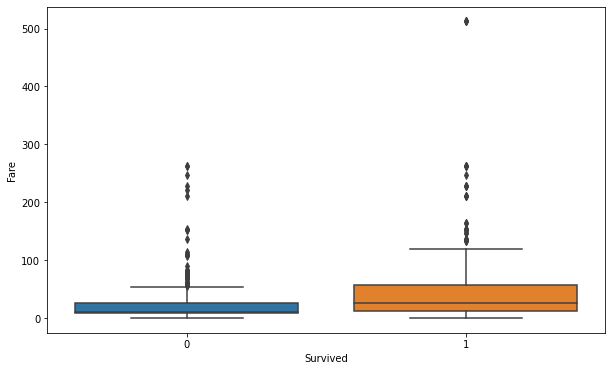

In [37]:
# Fare column have some outliers as observed during visualization
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x = train_data.Survived, y = train_data.Fare, data = train_data)

In [38]:
train_data[train_data.Fare > 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


* There are three records with id 259, 680 and 738 who have paid very high than other normal people
* So we can do two things:
    * First is to drop these three obsercations from the data set.
    * Second is to bucketize the <b>Fare</b> feature intro 4 buckets.
* We will bucketize the <b>Fare</b> into 4 buckets in the Feature Engineering selection.

### 5. Identify Evaluation Parameters
* The evaluation metrix used in this challenge is accuracy. #### Accuracy
* Accuracy is also used as stastictical measure of how well a binary classification test correctly identifies or excludes a condition.
* That is, the accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.
* The formula for quantifying binary accuracy is:
    * Accuracy = (TP + TN) / (TP + TN + FP + FN)
    * where: TP = True positive; FP = False positive; TN = True negative; FN = False negative
* https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

### 6 Feature Engineering

#### Remove Redundant Features

* Droping Cabin, Name and Ticket from both training data and test data. Cabin has lot of missing values.
* Name and Ticket number does not have much impact on the survival of the passengers.

In [39]:
columns_to_drop = ['Cabin','Name','Ticket']
train_data.drop(columns = columns_to_drop, axis=1, inplace = True)
test_data.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Converting Categorical Data to Numerical 
* There are two categorical features:
    * Sex : Male or Female
    * Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S= Southampton

In [41]:
# Training Data
train_data = pd.get_dummies(train_data, columns=['Sex','Embarked'], drop_first=True)
# Test Data
test_data = pd.get_dummies(test_data, columns=['Sex','Embarked'], drop_first=True)

* Divide Age Feature into 4 parts:
    * age <=12 Child (0)
    * age <= 18: Teenage(1)
    * age <= 59: Adult(2)
    * age >= 60: Old(3)
    
     

In [42]:
def age_bucketizer(r):
    if r <= 12:
        return 0
    elif r <= 18:
        return 1
    elif r <= 59:
        return 2
    else:
        return 3
        
# Apply the above function on age column for both train data and test data
train_data['age_class'] = train_data.Age.apply(age_bucketizer)
test_data['age_class'] = test_data.Age.apply(age_bucketizer)

#### Bucketizing Continuous fature Fare


In [43]:
first_quartile_fare = train_data.Fare.quantile(0.25)
second_quartile_fare = train_data.Fare.quantile(0.5)
third_quartile_fare = train_data.Fare.quantile(0.75)
def fare_bucketizer(r):
    if r <= first_quartile_fare:
        return 0
    elif r <= second_quartile_fare:
        return 1
    elif r <= third_quartile_fare:
        return 2
    else:
        return 3
        
# Apply above function to fare columns of train data and test data
train_data['fare_class'] = train_data.Fare.apply(fare_bucketizer)
test_data['fare_class'] = test_data.Fare.apply(fare_bucketizer)


In [44]:
# drop Age and Fare columns
train_data.drop(columns=['Age', 'Fare'], axis=1, inplace = True)
test_data.drop(columns=['Age','Fare'], axis=1, inplace=True)

### 7 Pre - modelling Work

Split the training data

In [45]:
feature_data = train_data.drop(columns=['Survived'])
target = train_data.Survived

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(feature_data,target,test_size=0.3, random_state=42)

### 8 Model Building 


In [46]:
models = [] # To store all the models
accuracy = [] # To store the accuracy of respective models

### 8.1 Logistic Regression
* This model us used to fit the line that best fits the data such that the line separates two classes.
* This model is used only when the target variable is categorical in Nature. For example, in this case to predict if the passenger survived or not 
* The line equation is given as:

* The output class is classified using logit/sigmoid function.
* Mathematically, sigmoid function is:
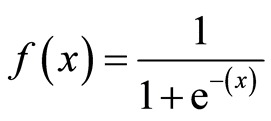
* Graphically sigmoid function is :
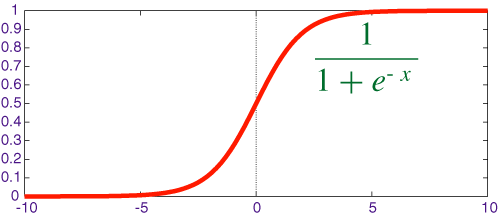
* f(x) value ranges between 0 and 1.
* Sigmoid function crosses 0.5 at origin
* This model calculates:
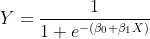
* If Y<0.5, class 0 is the output else class 1 is the output


Important points for Logistic Regression
* It is a supervised learning algorithm.
* Widely used for classification problems 
* Doesn't require linear relationship between dependent and independent variables
* Works well for large sample sizes
* If  the value of target variable is ordinal, then it is called as ordinal logistic regression
* If dependent variable is multi - class then it is known as Multinomial Logistic Regression


Logistic Regression Tutorials:
1. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
2. https://www.geeksforgeeks.org/understanding-logistic-regression/

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fit the model
lr.fit(trainX,trainY)

# predict the data
y_pred = lr.predict(testX)

# store the model in models
models.append('Logistic Regression')

#### Confusion Matrix and Accuracy

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(testY, y_pred))
print(round(accuracy_score(testY, y_pred),2))

# store the accuracy score
accuracy.append(round(accuracy_score(testY, y_pred),2))

[[131  26]
 [ 30  81]]
0.79


### 8.2 K Nearest Neighbours(KNN)
* KNN is a non parametric method used for classification problems.
* It is one of the simplest yet very powerfull classification algorithm.
* Here K is nothing but the number of nearest neighbours voting for the test data.
* It uses the least distance measure(like Euclidean distance, Manhattan distance, etc) to find the nearest neighbour.
* It is also said as lazy learning algorithm because there is no learning phase of the model and all computations are hold off until the classification.
* Here the function or the test data is predicted locally and so it is also said as an instance based learning algorithm.

#### Working of K Nearesr Neighbours 
Let'hace a simple case to understand this algorithm. We have some data points of two classes as shown in the figure below. Let two classes be class yellow and class purple. There is a test data point black star.
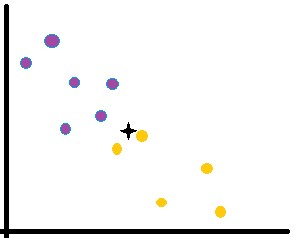
Here we are trying to find the class of the star. Let's take k =3 . Now constructing a boundry including black star and those 3 data points which are nearest to it:
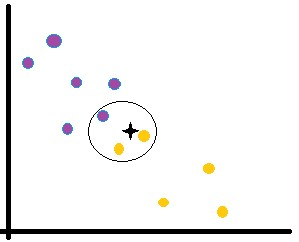
Out of 3 closest point two belongs to class yellow and confidently we can say that black star also belongs to class yellow as majority vote from the nearest neighbours went for class yellow.

Important points about KNN
* This algorithm is simmple and easy to implement.
* This algorithm can be used when there is non linear decision boundary between classes.
* It is good to use when there is large amount of data.
* It is supervised learning algorithm

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# checking different values of k
for k in range(1, 15):
    knn = KNeighborsClassifier(k)
    knn.fit(trainX,trainY)
    print(k)
    print(knn.score(trainX,trainY))
    print(knn.score(testX,testY))

1
0.7704654895666132
0.6455223880597015
2
0.8539325842696629
0.753731343283582
3
0.7913322632423756
0.7238805970149254
4
0.8346709470304976
0.7574626865671642
5
0.8523274478330658
0.7873134328358209
6
0.8475120385232745
0.7835820895522388
7
0.8539325842696629
0.8059701492537313
8
0.8426966292134831
0.7947761194029851
9
0.8459069020866774
0.7947761194029851
10
0.8362760834670947
0.7835820895522388
11
0.841091492776886
0.7835820895522388
12
0.8346709470304976
0.7873134328358209
13
0.8330658105939005
0.7761194029850746
14
0.8346709470304976
0.7798507462686567


The best value of k seems to be 7 as the train score and test score here are higher than other values of k as well as the difference between test score and train score is minimum.

In [50]:
# Fitting model for k =7 
knn = KNeighborsClassifier(7)

# store the model
models.append('KNN')

# fit the model
knn.fit(trainX,trainY)

# predict for testX
knn_pred = knn.predict(testX)

print(confusion_matrix(testY, knn_pred))
print(round(accuracy_score(testY, knn_pred),2))

# store the accuracy score
accuracy.append(round(accuracy_score(testY,knn_pred),2))

[[141  16]
 [ 36  75]]
0.81


### 8.3 Decision Tree
* Decision Tree is a graph that uses a branching method to illustrate every possible outcome of a decision.
* In decision tree, each internal node tests an attribute, each branch corresponds to attribute value, and each leaf node assigns a decision.
#### Working of the algorithm
* It starts with the root node.
* It iterates through the unused attributes and calculates Entropy(H) and Information Gain(IG) of this attribute.
* It then selects the attribute with highest Information Gain.
* Then again the set is split by the selected attribute in order to produce subset of data.
* The algorithm continues to recur on each subset considering unused attributes.
#### Attribute Selection Measures
* Selecting the root node randomly among all the nodes may give us a bad results with low accuracy.
* That is why deciding the attribute to be placed at the root node or at different levels of the tree as internal node is a complex task.
* Some criteria/measures used for attribute selection are:
1. Entropy and Information Gain,
2. Gini Index and Gini Gain
#### Entropy and Information Gain
#### Entropy

* Entropy is the measure of the randomness in the information being produced.
* Entropy can also be roughly thought as how much variance the data has.
* Higher Entropy makes hard to come to a decision.
* Mathematically, entropy is:
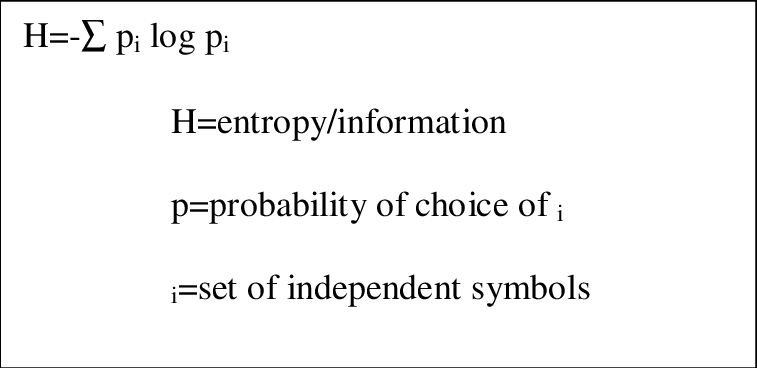
#### Information Gain
* It is a decrease in Entropy.
* It is the difference between entropy before split and average entropy after split
#### Gini Index and Gini Gain
#### Gini Index

* A cost function used to evaluate splits in the data set.
* Calculated by subtracting the sum of the squared of probabilities of each class from 1.
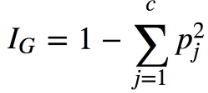
#### Gini Gain
* It is again the decrease in gini index.
* It is the difference between gini index before split and average gini index afer split.

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# store the model in models
models.append('Decision Tree')

# fit the data
dt.fit(trainX,trainY)

# predict the data 
dt_pred = dt.predict(testX)

print(confusion_matrix(testY, dt_pred))
print(round(accuracy_score(testY,dt_pred),2))

# store the accuracy score
accuracy.append(round(accuracy_score(testY,dt_pred),2))

[[129  28]
 [ 36  75]]
0.76


### 9. Model Comparison

In [52]:
# print(models,accuracy)

model_compare = pd.DataFrame({'models': models, 'accuracy': accuracy})
model_compare

,models,accuracy
0,Logistic Regression,0.79
1,KNN,0.81
2,Decision Tree,0.76


* K Nearest Neighbours is the model with highest accuracy.

### Submission

In [53]:
test_data.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [54]:
# prediction for test data
test_prediction = knn.predict(test_data)

# creating dataframe for the predict value with thier passengerid
submission = pd.DataFrame({"PassengerId":test_data.index,"Survived":test_prediction})

# type conversion
submission.PassengerID = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

# Creating a csv file with test prediction
submission.to_csv("titanic_submission.csv",index=False)